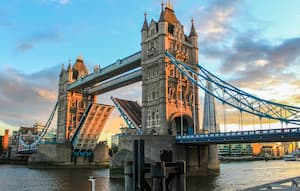

A medida que cambia el clima, predecir el tiempo se vuelve cada vez más importante para las empresas. Se le ha pedido que apoye un proyecto de aprendizaje automático con el objetivo de construir un sistema para predecir el clima en Londres, Inglaterra. Específicamente, el modelo debería predecir la temperatura media en grados Celsius (°C).

Dado que el clima depende de muchos factores diferentes, querrás realizar muchos experimentos para determinar cuál es el mejor enfoque para predecir el clima. En este proyecto, ejecutará experimentos para diferentes modelos de regresión que predicen la temperatura media, utilizando una combinación de "sklearn" y "mlflow".

You will be working with data stored in `london_weather.csv`, which contains the following columns:
- **date** - Fecha registrada de medición - (**int**)
- **cloud_cover** - Medición de la nubosidad en octas. - (**float**)
- **sunshine** - Medición de la luz solar en horas (hrs) - (**float**)
- **global_radiation** - Medición de irradiancia en vatios por metro cuadrado. (W/m2) - (**float**)
- **max_temp** - Temperatura máxima registrada en grados centígrados (°C) - (**float**)
- **mean_temp** - **target** Temperatura media en grados centígrados (°C) - (**float**)
- **min_temp** - Temperatura mínima registrada en grados centígrados (°C) - (**float**)
- **precipitation** - Medición de precipitación en milímetros (mm) - (**float**)
- **pressure** - Medición de presión en pascales (Pa) - (**float**)
- **snow_depth** - Medición de la profundidad de la nieve en centímetros. (cm) - (**float**)

In [ ]:
# Run this cell to install mlflow
!pip install mlflow

In [2]:
# Run this cell to import the modules you require
import pandas as pd
import numpy as np
import mlflow
import mlflow.sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Read in the data
weather = pd.read_csv("london_weather.csv")

# Start coding here
# Use as many cells as you like

Cómo abordar el proyecto
1. Cargando los datos
2. Limpieza de datos
3. Análisis de datos exploratorios
4. Selección de funciones
5. Datos de preprocesamiento
6. Capacitación y evaluación del aprendizaje automático.
7. Buscando los resultados registrados

In [60]:
#Cargamos las primeras 3 filas
weather.head()

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0


In [5]:
#Vemos la información del data frame
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              15341 non-null  int64  
 1   cloud_cover       15322 non-null  float64
 2   sunshine          15341 non-null  float64
 3   global_radiation  15322 non-null  float64
 4   max_temp          15335 non-null  float64
 5   mean_temp         15305 non-null  float64
 6   min_temp          15339 non-null  float64
 7   precipitation     15335 non-null  float64
 8   pressure          15337 non-null  float64
 9   snow_depth        13900 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 1.2 MB


## Limpieza de Datos

In [4]:
#Vemos el percentaje de nulos en cada una de las columnas
null = weather.isnull().sum()
round(null/len(weather)*100,2)

date                0.00
cloud_cover         0.12
sunshine            0.00
global_radiation    0.12
max_temp            0.04
mean_temp           0.23
min_temp            0.01
precipitation       0.04
pressure            0.03
snow_depth          9.39
dtype: float64

In [7]:
#Verificamos si hay duplicados
weather.duplicated().sum()

0

In [29]:
#Vemos la moda de la columna snow_depth para decidir el manejo de datos nulos
weather['snow_depth'].mode()
#Reemplazamos los datos nulos en dicha columna con '0'.
weather['snow_depth'].fillna(0.0, inplace=True)

<Axes: >

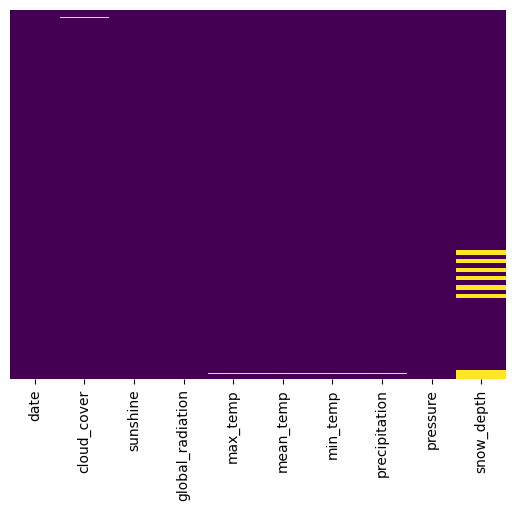

In [40]:
null_values = weather.isnull()
sns.heatmap(null_values, cbar=False, cmap='viridis', yticklabels=False)

In [11]:
null = weather['cloud_cover'].isnull()
weather[null]

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth,month
14,1979-01-15,NaN,0.0,15.0,5.9,3.8,1.0,0.1,102990.0,0.0,1
20,1979-01-21,NaN,0.0,16.0,1.5,0.0,-3.5,0.1,102170.0,0.0,1
37,1979-02-07,NaN,0.0,21.0,3.7,3.3,-0.2,0.4,99450.0,0.0,2
50,1979-02-20,NaN,0.0,27.0,3.6,1.6,0.3,0.0,103010.0,0.0,2
56,1979-02-26,NaN,4.2,82.0,8.9,1.6,-3.4,0.0,103590.0,0.0,2
250,1979-09-08,NaN,5.9,153.0,21.8,17.9,11.5,0.0,101870.0,0.0,9
287,1979-10-15,NaN,2.7,71.0,16.0,12.4,7.0,0.0,99970.0,0.0,10
320,1979-11-17,NaN,0.0,17.0,10.0,4.8,1.2,0.9,100840.0,0.0,11
323,1979-11-20,NaN,0.0,17.0,6.4,3.4,0.5,0.0,102950.0,0.0,11
324,1979-11-21,NaN,0.0,16.0,10.2,3.0,-0.4,0.2,103390.0,0.0,11


In [16]:
weather['cloud_cover'].value_counts()

cloud_cover
7.0    3191
6.0    3014
5.0    2329
8.0    1934
4.0    1834
3.0    1163
2.0     865
1.0     609
0.0     381
9.0       2
Name: count, dtype: int64

<Axes: xlabel='cloud_cover', ylabel='sunshine'>

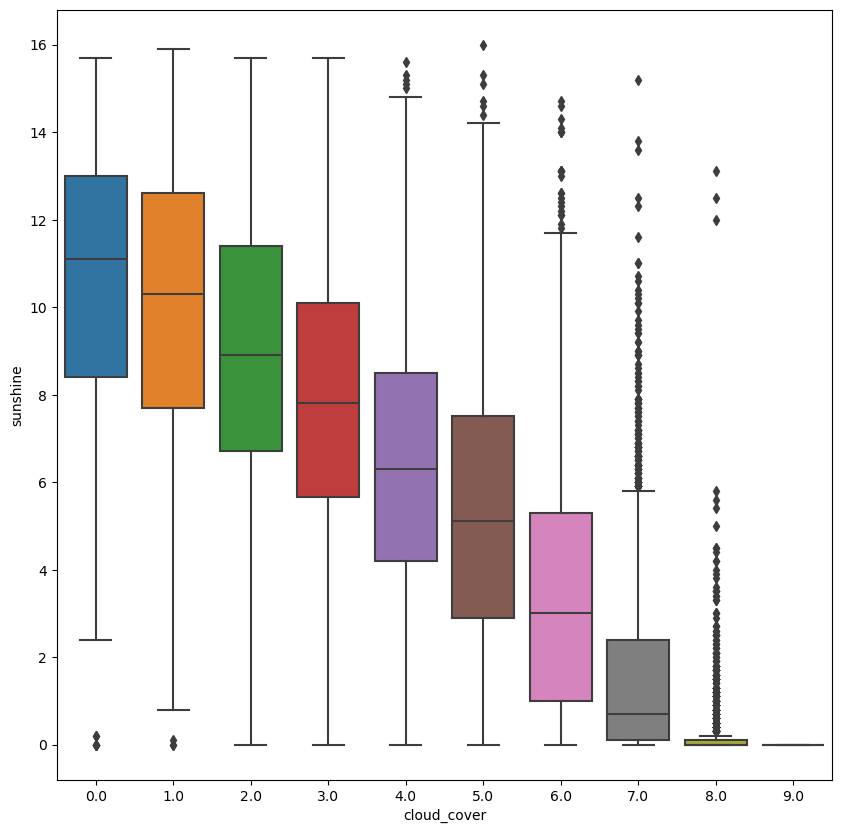

In [47]:
plt.figure(figsize= (10, 10))
sns.boxplot(x = 'cloud_cover',y='sunshine', data=weather)

In [6]:
# Cambiar la columna 'date' a formato de fecha
weather['date'] = pd.to_datetime(weather['date'], format='%Y%m%d')
#chequear cambio
weather.dtypes

date                datetime64[ns]
cloud_cover                float64
sunshine                   float64
global_radiation           float64
max_temp                   float64
mean_temp                  float64
min_temp                   float64
precipitation              float64
pressure                   float64
snow_depth                 float64
dtype: object

In [7]:
#Crear columna de mes
weather['month'] = weather['date'].dt.month
weather

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth,month
0,1979-01-01,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0,1
1,1979-01-02,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0,1
2,1979-01-03,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0,1
3,1979-01-04,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0,1
4,1979-01-05,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...
15336,2020-12-27,1.0,0.9,32.0,7.5,7.5,7.6,2.0,98000.0,NaN,12
15337,2020-12-28,7.0,3.7,38.0,3.6,1.1,-1.3,0.2,97370.0,NaN,12
15338,2020-12-29,7.0,0.0,21.0,4.1,2.6,1.1,0.0,98830.0,NaN,12
15339,2020-12-30,6.0,0.4,22.0,5.6,2.7,-0.1,0.0,100200.0,NaN,12


#### Lidiando con valores nulos

Vemos que cloud cover consiste en valores enteros del 0 al 9, es posible mejor imputar por la mediana los valores faltantes

In [39]:
weather_cleaned = weather.copy()
weather_cleaned['cloud_cover'] = weather_cleaned['cloud_cover'].fillna(value = weather['cloud_cover'].median)

<Axes: >

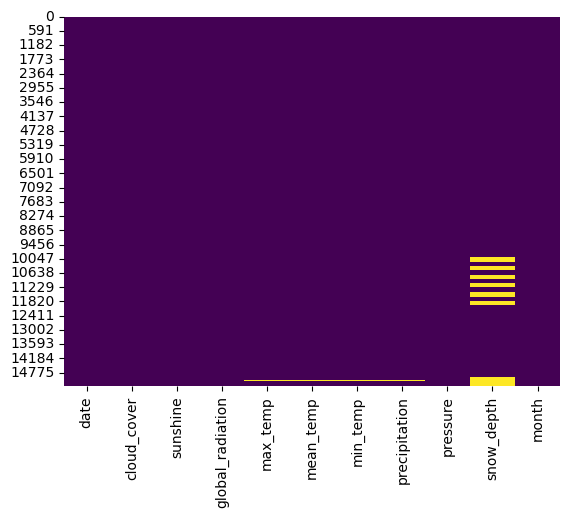

In [45]:
values = weather_cleaned.isnull()
sns.heatmap(values, cbar=False, cmap='viridis')

In [50]:
#Eliminamos los datos nulos de la columna 'min_temp' y 'max_temp' pues son pocos
weather_cleaned = weather_cleaned.dropna(subset = ['min_temp'])
weather_cleaned= weather_cleaned.dropna(subset = ['max_temp'])

In [54]:
#Para lidiar con los datos nulos del mean_temp utilizaremos un modelo para predecir los datos faltantes ya que hay una relación linear 
#entre esta columna y las columnas 'max_temp' y 'min_temp' 

# Separamos la data en completa y datos faltantes
data_complete = weather_cleaned.dropna()
data_missing = weather_cleaned[weather_cleaned['mean_temp'].isnull()]

# Definimos las variables
X = data_complete[['max_temp', 'min_temp']]  
y = data_complete['mean_temp']

# Separamos la data de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creamos el modelo

model = LinearRegression()
model.fit(X_train, y_train)

# Predecimos los datos faltantes
predicted_mean_temp = model.predict(data_missing[['max_temp', 'min_temp']])

# Imputamos los valores en el DataFrame original
weather_cleaned.loc[weather_cleaned['mean_temp'].isnull(), 'mean_temp'] = predicted_mean_temp

In [58]:
#Verificamos que no hayan datos faltantes
null = weather_cleaned['mean_temp'].isnull()
weather_cleaned[null]

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth,month


<Axes: xlabel='month', ylabel='snow_depth'>

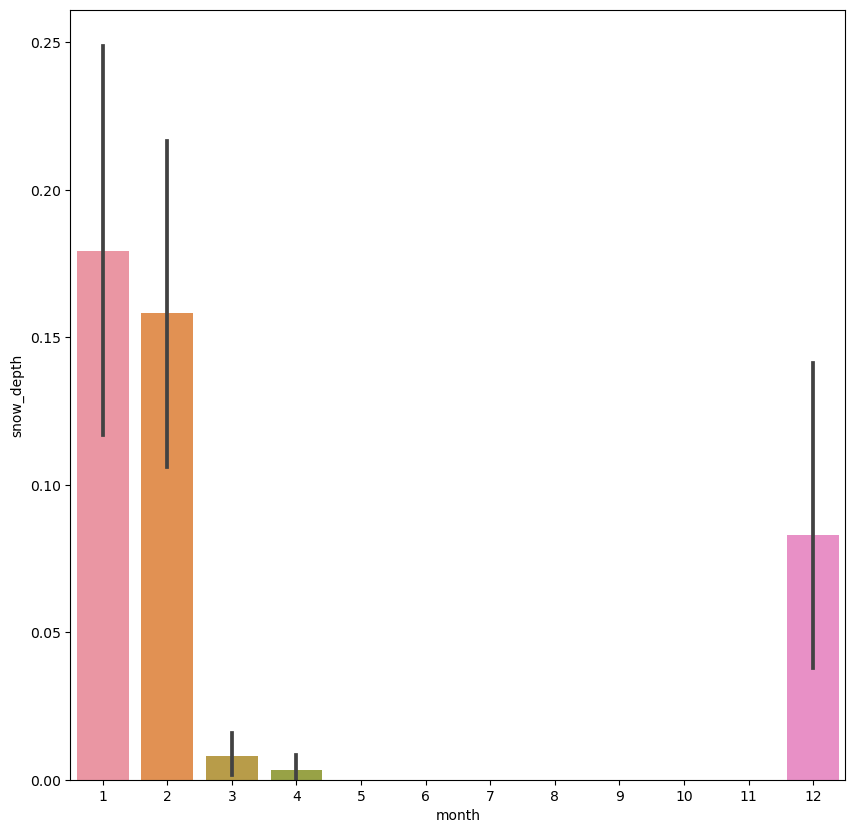

In [21]:
plt.figure(figsize= (10, 10))
sns.barplot(x ='month',y='snow_depth', data=weather)

#### Analizando como tratar los missing values de snow_depth

In [9]:
#Confirmando si hay datos nulos no solo en los meses que no hay nieve 
filtered_df = weather[weather['month'] == 11]
null_count = filtered_df['snow_depth'].notnull().sum()
print(f'Numero de datos nulos en snow_depth cuando month es 1:', null_count)

Numero de datos nulos en snow_depth cuando month es 1: 1223


In [10]:
filtered = weather[weather['month'] == 11]
filtered['snow_depth'].value_counts()

snow_depth
0.0    1223
Name: count, dtype: int64

Vemos que hay relacion entre snow_depth y month, por lo que podemos agrupar los datos atendiendo a esto e imputar con la media.

<Axes: xlabel='month', ylabel='snow_depth'>

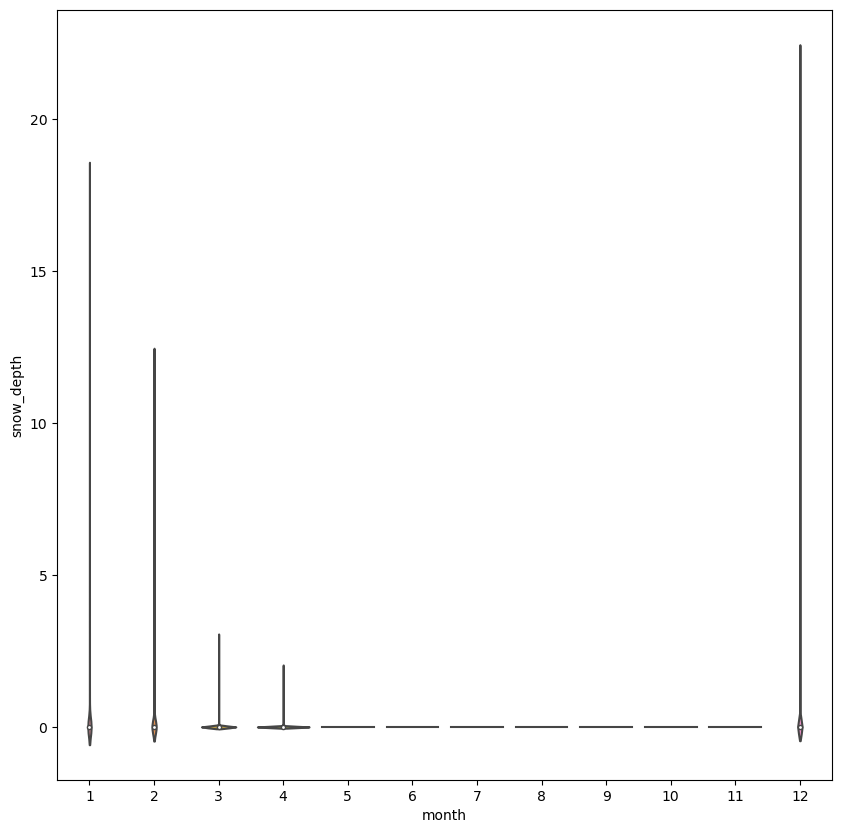

In [109]:
plt.figure(figsize= (10, 10))
sns.violinplot(x = 'month',y='snow_depth', data=weather)

In [104]:
#Crear funcion
def impute_snow_depth(cols):
    Snow_Depth = cols[0]
    month = cols[1]

    if pd.isnull(Snow_Depth):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        elif Pclass == 3:
            return 24
    else:
        return Age

# Apply the function to the DataFrame
df['Age'] = df[['Age', 'Pclass']].apply(impute_age, axis=1)

# Display the DataFrame to verify the changes
print(df)

SyntaxError: incomplete input (2670895032.py, line 2)

## Analisis Exploratorio de los Datos


In [54]:
weather.describe()

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
count,15341,15322.000000,15341.000000,15322.000000,15335.000000,15305.000000,15339.000000,15335.000000,15337.000000,13900.000000
mean,1970-01-01 00:00:00.019995671,5.268242,4.350238,118.756951,15.388777,11.475511,7.559867,1.668634,101536.605594,0.037986
min,1970-01-01 00:00:00.019790101,0.000000,0.000000,8.000000,-6.200000,-7.600000,-11.800000,0.000000,95960.000000,0.000000
25%,1970-01-01 00:00:00.019890702,4.000000,0.500000,41.000000,10.500000,7.000000,3.500000,0.000000,100920.000000,0.000000
50%,1970-01-01 00:00:00.020000101,6.000000,3.500000,95.000000,15.000000,11.400000,7.800000,0.000000,101620.000000,0.000000
75%,1970-01-01 00:00:00.020100702,7.000000,7.200000,186.000000,20.300000,16.000000,11.800000,1.600000,102240.000000,0.000000
max,1970-01-01 00:00:00.020201231,9.000000,16.000000,402.000000,37.900000,29.000000,22.300000,61.800000,104820.000000,22.000000
std,NaN,2.070072,4.028339,88.898272,6.554754,5.729709,5.326756,3.738540,1049.722604,0.545633


array([[<Axes: title={'center': 'date'}>,
        <Axes: title={'center': 'cloud_cover'}>,
        <Axes: title={'center': 'sunshine'}>],
       [<Axes: title={'center': 'global_radiation'}>,
        <Axes: title={'center': 'max_temp'}>,
        <Axes: title={'center': 'mean_temp'}>],
       [<Axes: title={'center': 'min_temp'}>,
        <Axes: title={'center': 'precipitation'}>,
        <Axes: title={'center': 'pressure'}>],
       [<Axes: title={'center': 'snow_depth'}>, <Axes: >, <Axes: >]],
      dtype=object)

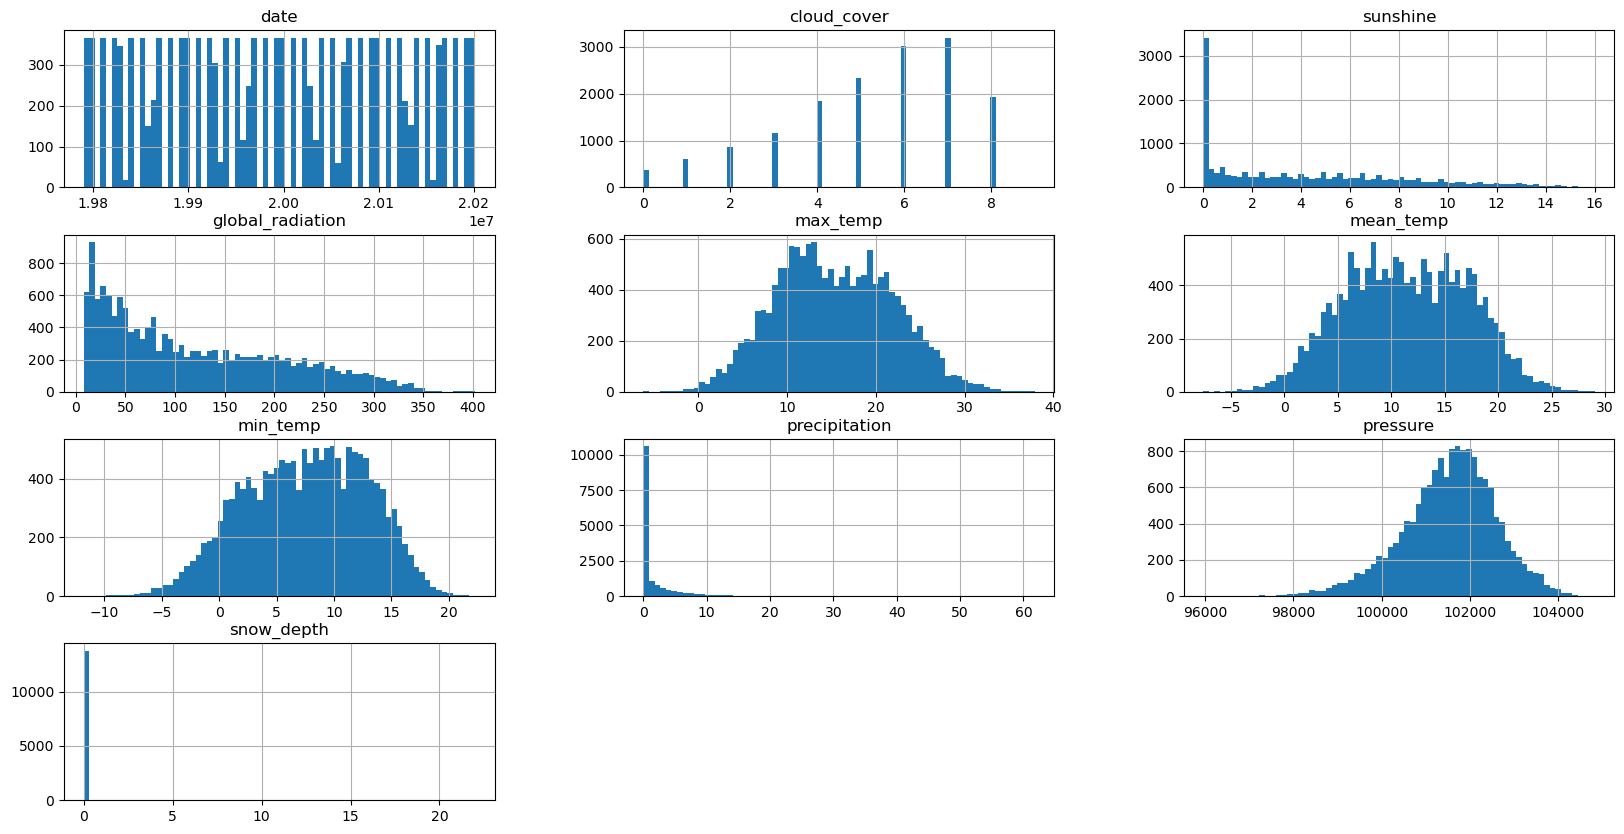

In [43]:
weather.hist(bins=70, figsize = (20,10))

array([[<Axes: title={'center': 'date'}>,
        <Axes: title={'center': 'sunshine'}>,
        <Axes: title={'center': 'global_radiation'}>],
       [<Axes: title={'center': 'max_temp'}>,
        <Axes: title={'center': 'mean_temp'}>,
        <Axes: title={'center': 'min_temp'}>],
       [<Axes: title={'center': 'precipitation'}>,
        <Axes: title={'center': 'pressure'}>,
        <Axes: title={'center': 'snow_depth'}>],
       [<Axes: title={'center': 'month'}>, <Axes: >, <Axes: >]],
      dtype=object)

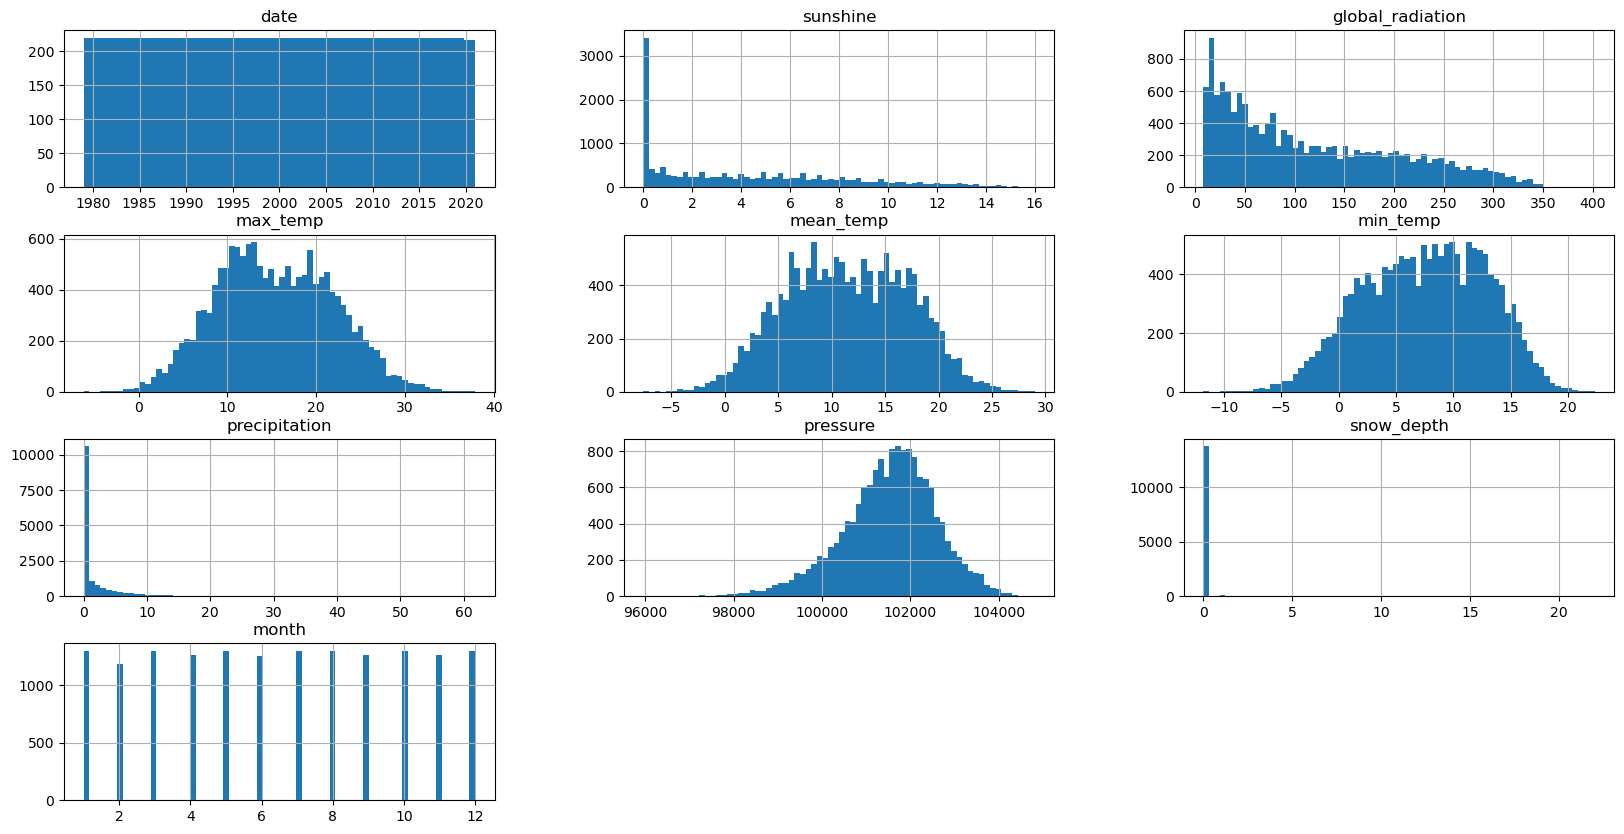

In [56]:
weather_cleaned.hist(bins=70, figsize = (20,10))

Vemos aqui la distribución de datos de cada variable

Podemos analizar lo siguiente:

#### Max_Temp:  

C:\Users\ANDREA DEJEAN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ANDREA DEJEAN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ANDREA DEJEAN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ANDREA DEJEAN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert in

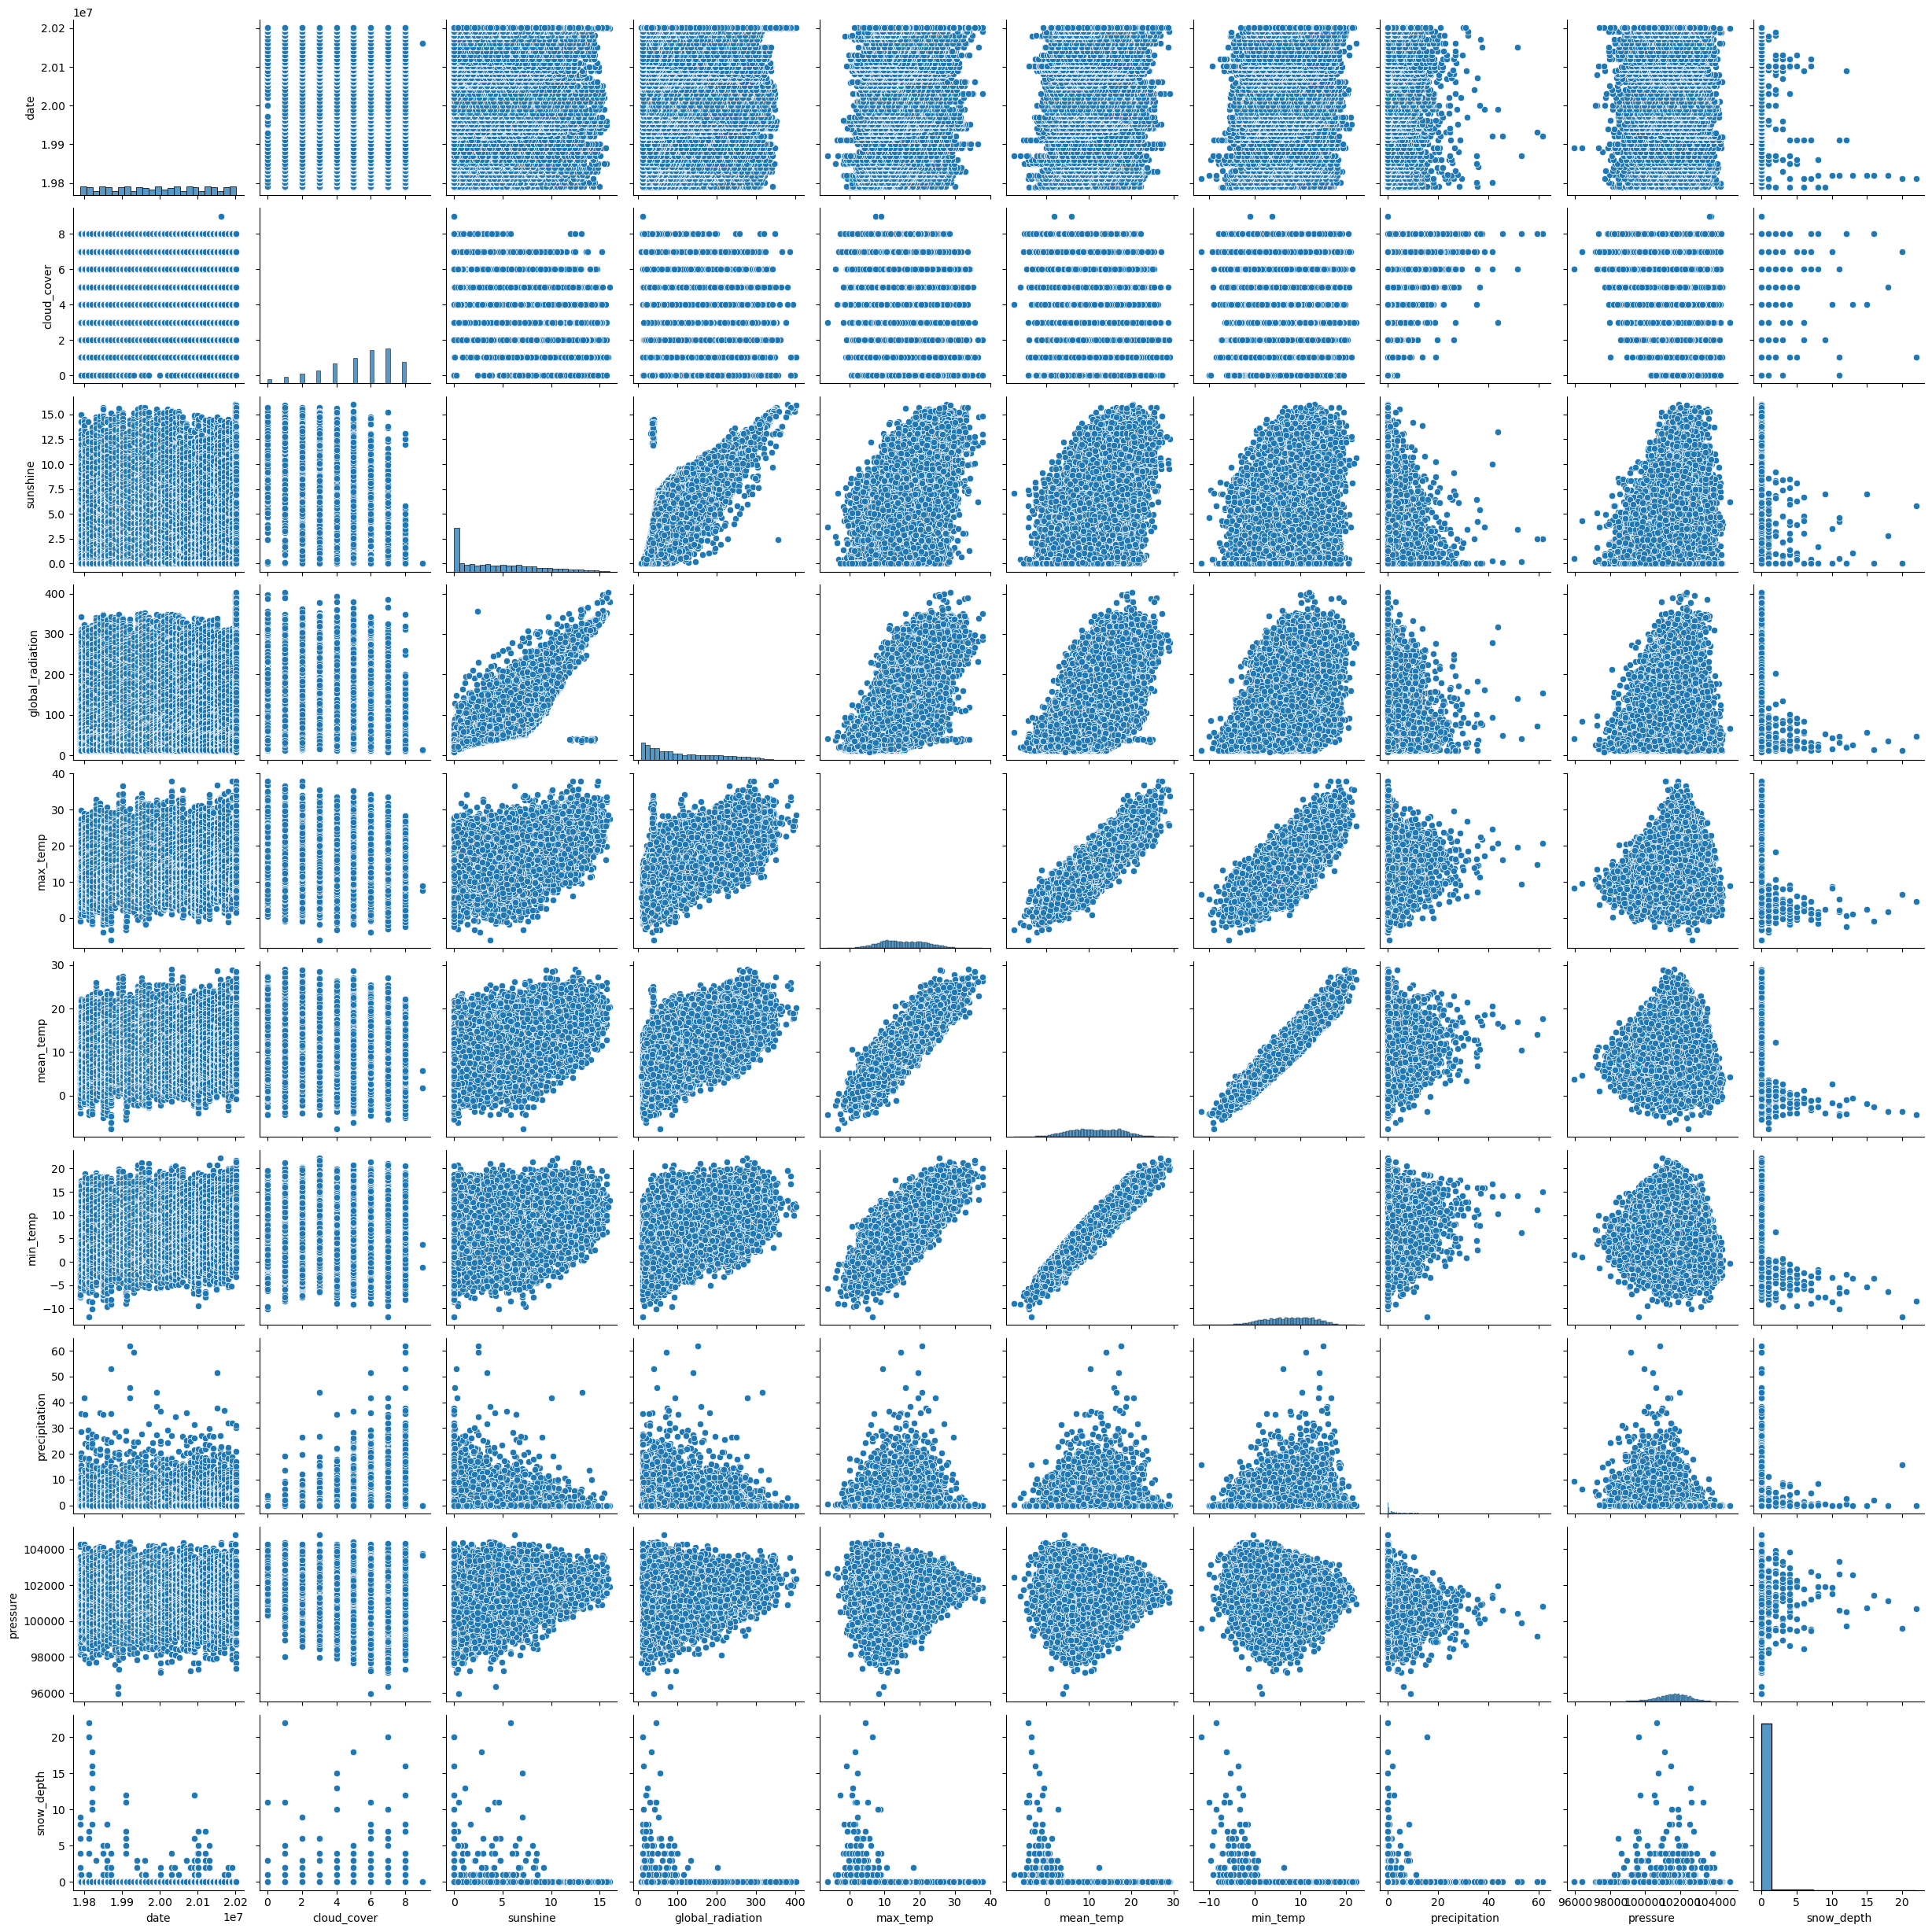

In [31]:
%matplotlib inline
sns.pairplot(weather)
plt.show()

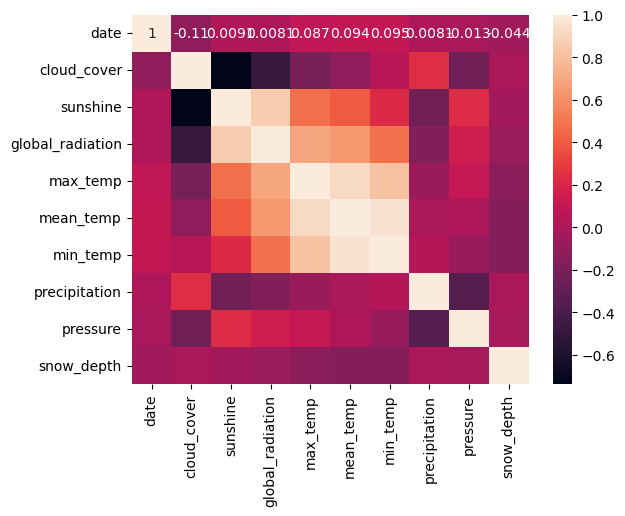

In [21]:
correlation_matrix = weather.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()

In [24]:
correlation_target = abs(correlation_matrix['mean_temp'])
relevant_features = correlation_target[correlation_target > 0.2]
print(relevant_features)

sunshine            0.396535
global_radiation    0.635432
max_temp            0.912200
mean_temp           1.000000
min_temp            0.955593
Name: mean_temp, dtype: float64
